Nama: Annur Riyadhus Solikhin <br>
Email: annurriyadhus17@gmail.com

Mengimport library yang dibutuhkan

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import missingno as msno
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [137]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Membaca file dataset dengan ekstensi .csv dan menyimpannya ke dataframe df

In [138]:
df = pd.read_csv('/content/gdrive/My Drive/Coolyeah/Semester 5/Dicoding ML/Machine Learning Terapan/Datasets/healthcare-dataset-stroke-data.csv')

In [139]:
df.shape

(5110, 12)

In [140]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Preprocessing

In [141]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Menampilkan informasi

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Mengecek jumlah missing value

In [143]:
# cek missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

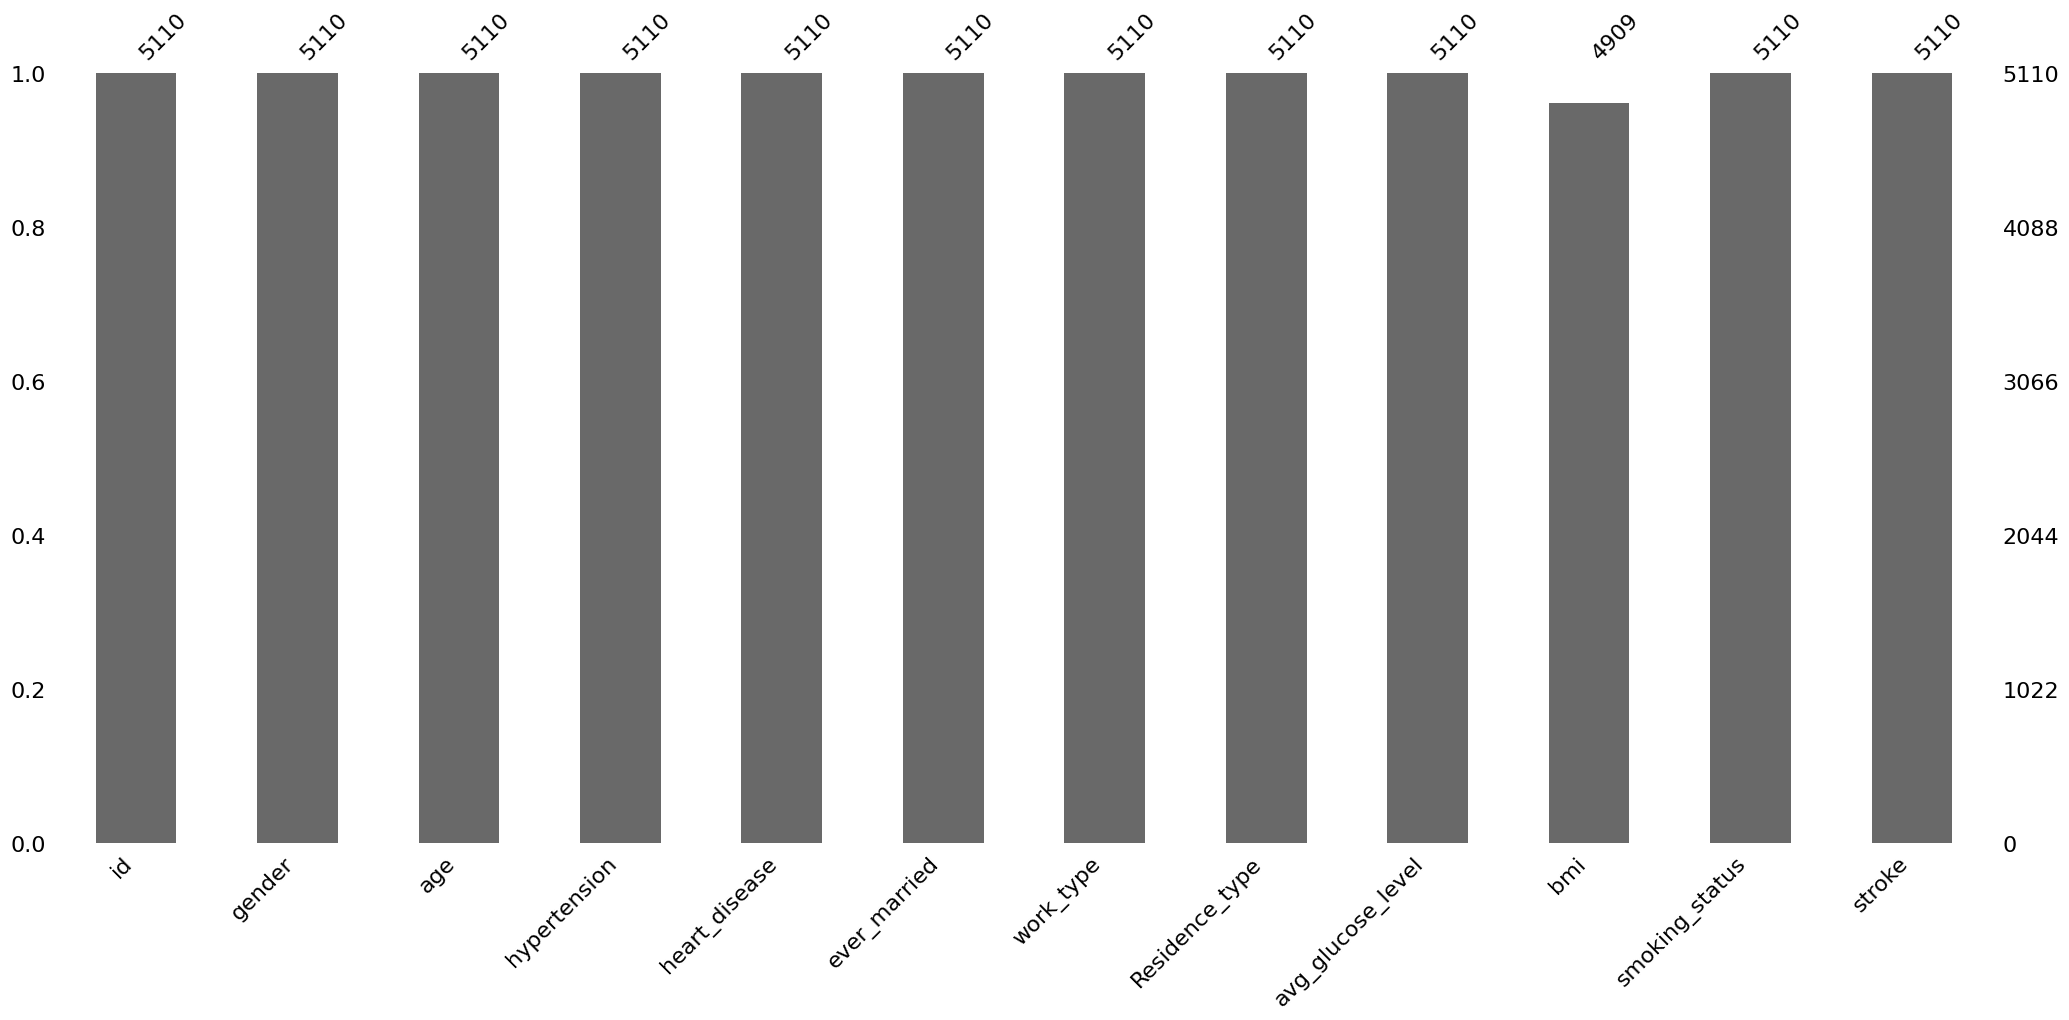

In [144]:
# visualisasi missing values
msno.bar(df)

<Axes: >

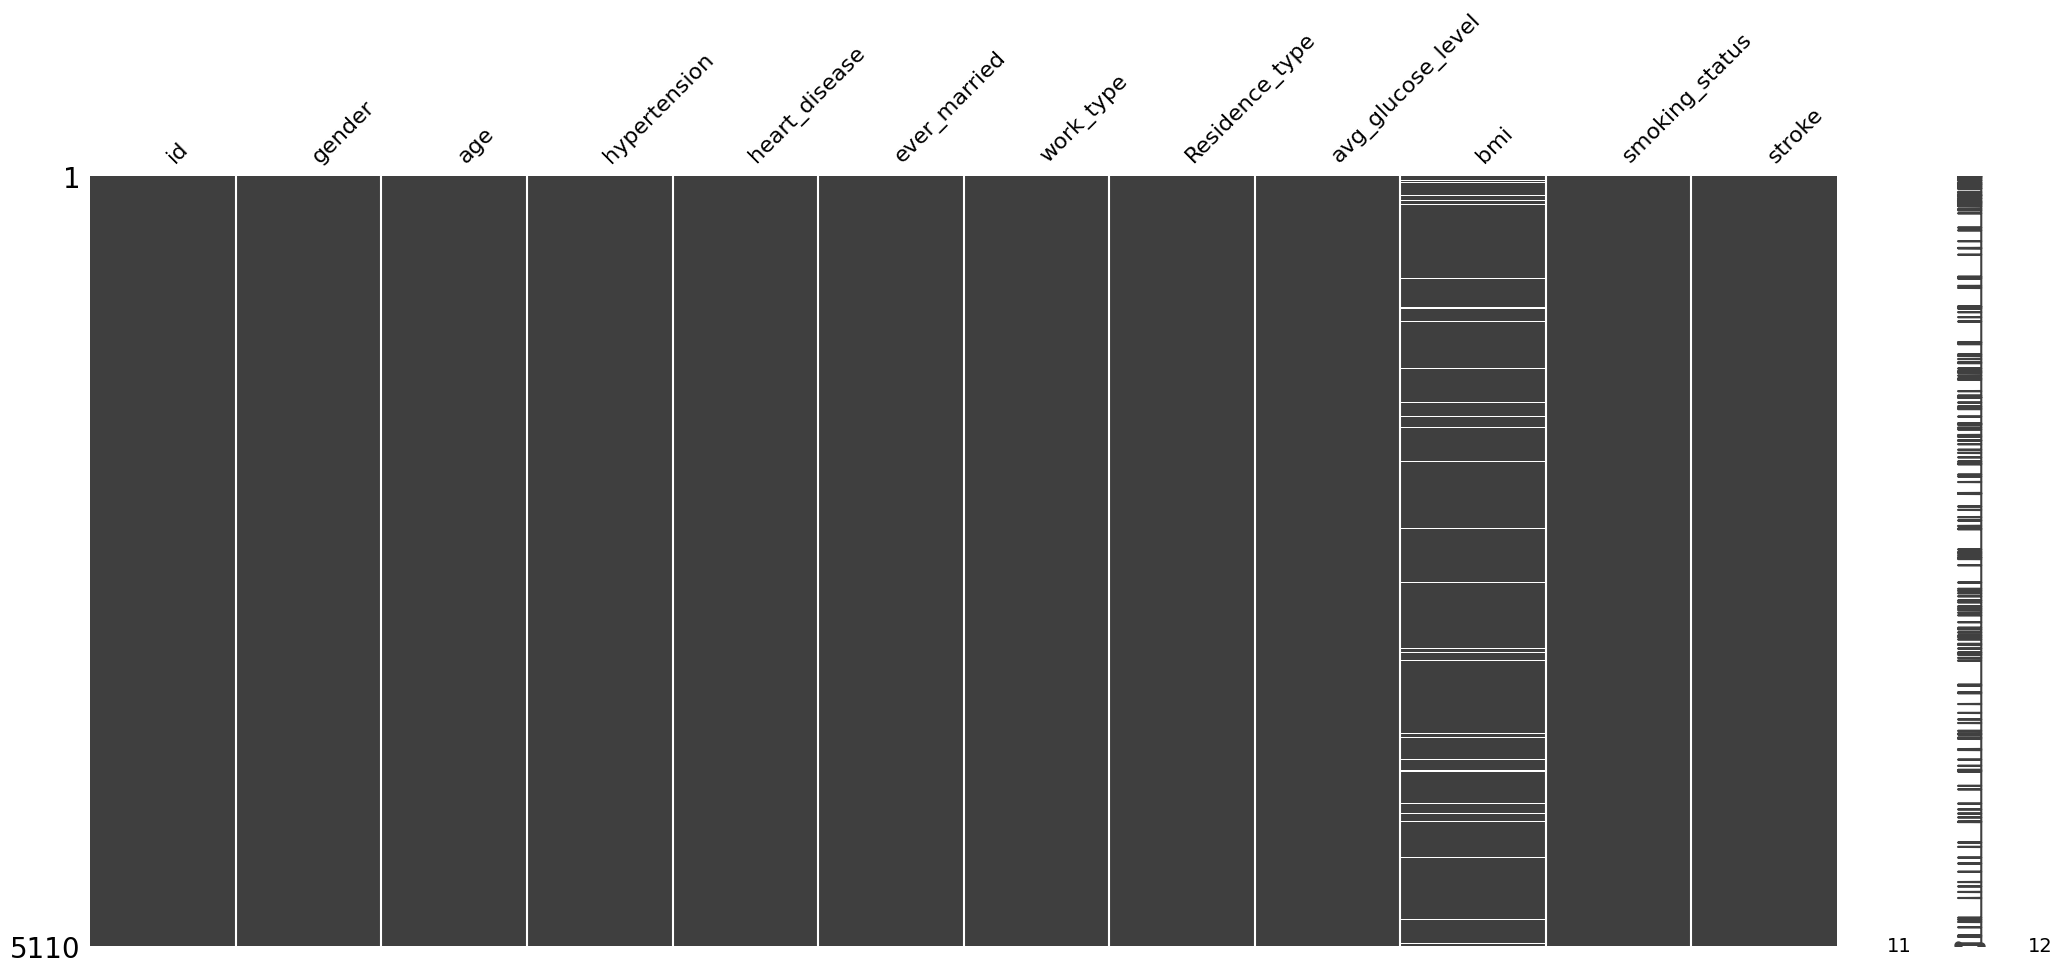

In [145]:
# visualisasi missing values
msno.matrix(df)

Mengisi missing value pada kolom bmi dengan metode KNN

In [146]:
from sklearn.impute import KNNImputer

# membuat salinan dari dataframe asli
df = df.copy()

# pilih kolom yang terdapat missing value
column_with_missing = 'bmi'

# membuat instance KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Melakukan imputasi KNN pada kolom yang dipilih
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Memeriksa DataFrame yang telah diimputasi
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [147]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


membuat dataframe baru tanpa kolom id

In [150]:
df = pd.DataFrame(df, columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke'])

In [151]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


cek kembali missing values

In [152]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [153]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Melakukan label encoding pada kolom-kolom tertentu dalam DataFrame menggunakan LabelEncoder dari modul preprocessing dalam scikit-learn

In [154]:
# Create a DataFrame object
from sklearn import preprocessing
data_df = pd.DataFrame(df, columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke'])

# Iterate over column names
for column in data_df:

    label_encoder = preprocessing.LabelEncoder()

    data_df[column]= label_encoder.fit_transform(data_df[column])
    data_df[column].unique()

In [155]:
data_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162,2,0
5106,0,102,0,0,1,3,1,3030,274,2,0
5107,0,56,0,0,1,3,0,1314,180,2,0
5108,1,72,0,0,1,2,0,3363,129,1,0


In [156]:
df=data_df

Memvisualisasikan distribusi kelas pada kolom "stroke" dalam DataFrame

Class=1, n=249 (4.873%)
Class=0, n=4861 (95.127%)


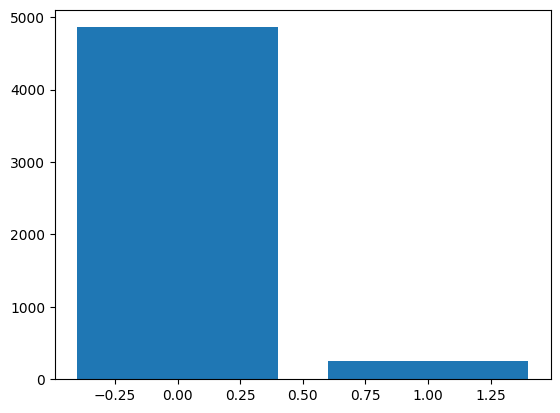

In [157]:
from collections import Counter
from matplotlib import pyplot

# summarize distribution
counter = Counter(df["stroke"])
for k,v in counter.items():
	per = v / len(df["stroke"]) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Memvisualisasikan matriks korelasi dari DataFrame

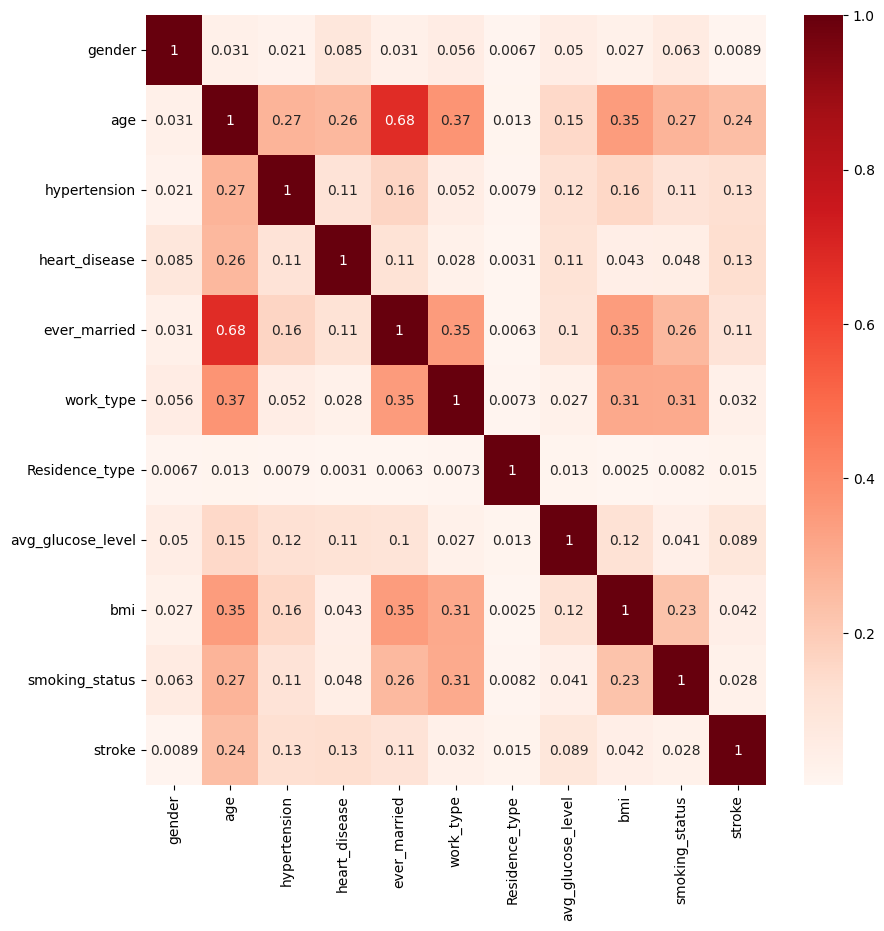

In [158]:
import pandas as pd
import numpy as np
import seaborn as sn

# create correlation matrix with abs values
corr_matrix = df.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
# threshold = 0.5

filtered_corr_df = corr_matrix

plt.figure(figsize=(10,10))
sn.heatmap(filtered_corr_df, annot=True, cmap="Reds")
plt.show()

Import library MinMaxScaler dan menginisiasi MinMaxScaler

In [159]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()

Mendefinisikan feature set dan target

In [160]:
# Mendefiniskan feature set
X = df.drop('stroke', axis=1)

# Mendefinisikan target variable : stroke (1) or non-stroke (0)
y = (df['stroke'])

Melakukan seleksi fitur dengan menggunakan chi square

In [161]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=4)
chi2_selector.fit(X, y)

cols = chi2_selector.get_support(indices=True)

df_selected_features = X.iloc[:, cols]

In [162]:
df_selected_features

,age,heart_disease,avg_glucose_level,bmi
0,88,1,3850,240
1,82,0,3588,162
2,101,1,2483,199
3,70,0,3385,218
4,100,0,3394,113
...,...,...,...,...
5105,101,0,1360,162
5106,102,0,3030,274
5107,56,0,1314,180
5108,72,0,3363,129


Split data ke train dan test dataset.

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_selected_features, y,stratify=y,test_size=0.3)#random_state=0,

Import library SMOTETomek

In [164]:
from imblearn.combine import SMOTETomek

Menerapkan standarisasi pada train dan test set

In [166]:
X_train_ns_scale=scaler.fit_transform(X_train_ns)
X_test_scale=scaler.transform(X_test)

In [167]:
df_test = pd.DataFrame(X_test_scale, columns = ['age', 'heart_disease', 'avg_glucose_level', 'bmi'])

In [168]:
df_test

,age,heart_disease,avg_glucose_level,bmi
0,0.893204,0.0,0.512324,0.775120
1,0.543689,0.0,0.144115,0.358852
2,0.679612,0.0,0.189638,0.488038
3,0.543689,0.0,0.422787,0.576555
4,0.368932,0.0,0.757797,0.444976
...,...,...,...,...
1528,0.728155,0.0,0.861670,0.478469
1529,0.271845,0.0,0.699447,0.078947
1530,0.281553,0.0,0.228873,0.160287
1531,0.854369,0.0,0.097082,0.492823


implementasi Support Vector Machine (SVM) untuk klasifikasi pada dataset yang telah diresample menggunakan SMOTETomek

0.8114807566862361
SVM TRAIN 0.790144596651446
FOR TEST DATA
[[1199  259]
 [  30   45]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1458
           1       0.15      0.60      0.24        75

    accuracy                           0.81      1533
   macro avg       0.56      0.71      0.56      1533
weighted avg       0.94      0.81      0.86      1533

roc_auc_score 0.7111796982167353


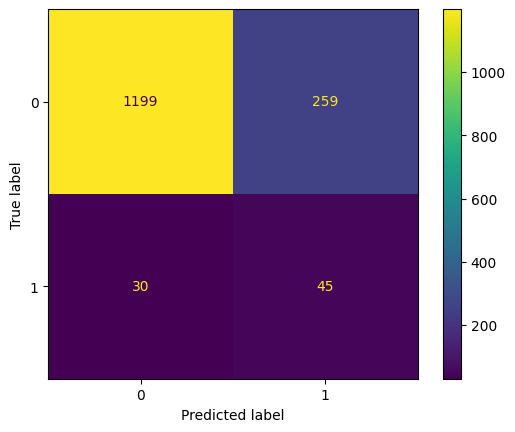

In [169]:
"""Support Vector Machine"""

from sklearn.svm import SVC
svc = SVC(C=100,gamma=.1, probability=True)
svc = svc.fit(X_train_ns_scale, y_train_ns)

# melakukan prediksi terhadap dataset test
y_pred_test_svm = svc.predict(X_test_scale)

# melakukan prediksi terhadap dataset train
y_pred_train_svm = svc.predict(X_train_ns_scale)

# menampilkan akurasi pada prediksi data test
print(metrics.accuracy_score(y_test, y_pred_test_svm))

# menampilkan akurasi pada prediksi data train
import sklearn.metrics as metrics
scores_svm=metrics.accuracy_score(y_train_ns,y_pred_train_svm)
print("SVM TRAIN",scores_svm)

print("FOR TEST DATA")
metrics.roc_curve(y_test, y_pred_test_svm)
print(metrics.confusion_matrix(y_test, y_pred_test_svm))
print(metrics.classification_report(y_test, y_pred_test_svm))
print("roc_auc_score",roc_auc_score(y_test, y_pred_test_svm))

cm = confusion_matrix(y_test, y_pred_test_svm, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=svc.classes_)
disp.plot()
plt.show()

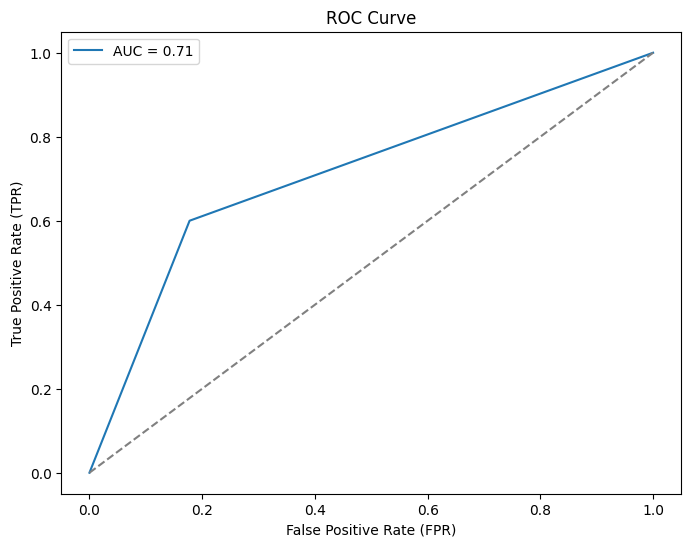

In [176]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk berbagai threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_svm)

# Menghitung nilai AUC (Area Under the Curve) untuk mengukur kinerja model secara keseluruhan
auc = roc_auc_score(y_test, y_pred_test_svm)

# Membuat plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Garis dasar untuk perbandingan
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [170]:
y_pred_test_svm

array([0, 0, 0, ..., 0, 1, 1])

In [171]:
df_test['prediction'] = y_pred_test_svm

In [172]:
df_test

,age,heart_disease,avg_glucose_level,bmi,prediction
0,0.893204,0.0,0.512324,0.775120,0
1,0.543689,0.0,0.144115,0.358852,0
2,0.679612,0.0,0.189638,0.488038,0
3,0.543689,0.0,0.422787,0.576555,0
4,0.368932,0.0,0.757797,0.444976,0
...,...,...,...,...,...
1528,0.728155,0.0,0.861670,0.478469,0
1529,0.271845,0.0,0.699447,0.078947,0
1530,0.281553,0.0,0.228873,0.160287,0
1531,0.854369,0.0,0.097082,0.492823,1


In [173]:
print(df_test['prediction'].value_counts())

0    1229
1     304
Name: prediction, dtype: int64


Melakukan evaluasi terhadap model yang dibuat

In [174]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test_svm))
print("Precision:", precision_score(y_test, y_pred_test_svm))
print("Recall:", recall_score(y_test, y_pred_test_svm))
print("F-Score:", f1_score(y_test, y_pred_test_svm))

Accuracy: 0.8114807566862361
Precision: 0.14802631578947367
Recall: 0.6
F-Score: 0.23746701846965695
